In [5]:
pip install "keras==2.6.0"

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.1.3
    Uninstalling Keras-2.1.3:
      Successfully uninstalled Keras-2.1.3
You should consider upgrading via the '/work/xhe4/gaze_project1/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Load the model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.metrics import categorical_accuracy
def euclideanLoss(y_true, y_pred):
    return K.mean(K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1)))
model = keras.models.load_model("save_model/1", custom_objects={'euclideanLoss':euclideanLoss,'categorical_accuracy':categorical_accuracy})

# Prepare the input data for testing

In [3]:
from mtcnn import MTCNN
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import gzip
import os

In [4]:
def crop_face(data):
    faces = []
    for i in range(len(data)):
        img = Image.open(base_dir + data.loc[i,'filename'])
        width, height = img.size
        face = img.crop((data.loc[i,'bbox_x'] * width, data.loc[i,'bbox_y'] * height,
                     (data.loc[i,'bbox_w'] * width) + (data.loc[i,'bbox_x'] * width),
                     (data.loc[i,'bbox_h'] * height) + (data.loc[i,'bbox_y'] * height)))
        face = face.resize((32,32))
        face_ar = np.array(face)
        faces.append(face_ar)
    return faces

def h5(out_file):
    viList = os.listdir(base_dir)
    res = {}
    for video in viList:
        im = Image.open(base_dir + video)
        im = im.resize((256, 256))
        im_ar = np.array(im)
        a = im_ar.astype("float") / 255.0
        res[video]=a
    with open ('image_dict_frames_try.h5', 'wb') as f:
        pickle.dump(res,f)
    f.close()

In [5]:
def image(base_dir):
#     viList = os.listdir(base_dir)
    viList =[f for f in os.listdir(base_dir) if not f.startswith('.')]
    res = {}
    for video in viList:
#         im =load_img('{}/{}'.format(base_dir, video), grayscale=False, target_size=(256, 256))
#         im_ar = img_to_array(im, data_format='channels_last')
        im = Image.open(base_dir+'/' + video).convert('RGB')
        im = im.resize((256, 256))
        im_ar = np.array(im)
        a = im_ar.astype("float") / 255.0
        print(np.shape(a))
        res[video]=a
    return res

def head_cord(face):
    head_x = face['box'][0]+face['box'][2]/2
    head_y = face['box'][1]+face['box'][3]/2
    return (head_x,head_y)

In [64]:
# from keras.preprocessing.image import load_img, img_to_array
# ip =load_img('TestData/9.png', grayscale=False, target_size=(256, 256))
# ip = img_to_array(ip, data_format='channels_last')
# np.shape(np.array(ip))
# ip

In [6]:
def load_test(base_dir,images_dic):
    filenames = []
    faces_li = []
    heads = []    
    record = []
    ImaList = [f for f in os.listdir('TestData') if not f.startswith('.')]
#     ImaList = os.listdir(base_dir)
    det = []    
    #use mtcnn to detect the faces and append to record(image,faces)
    for image in ImaList:
        img = cv2.cvtColor(cv2.imread(base_dir+'/'+image), cv2.COLOR_BGR2RGB)
        detector = MTCNN()
        faces = detector.detect_faces(img)
        record.append([image,faces])        
    # for each detected face, 
    for pair in record:
        im_faces = pair[1]
        filename = pair[0]
        img = Image.open(base_dir+'/' +filename)
        w= np.size(img)[0]
        h= np.size(img)[1]       
#         print("pair:",pair)
#         print("im_faces:",im_faces)
        print("file:",filename)
        for face in im_faces:
            filenames.append(filename)
            (head_x,head_y) = head_cord(face)
            heads.append((head_x/w,head_y/h))
            ltx = face['box'][0]
            lty = face['box'][1]
            rbx = ltx + face['box'][2]
            rby = lty +face['box'][3]
            print((ltx,lty,rbx,rby))        
            img = Image.open(base_dir+'/'+filename ).convert('RGB')
            face_ima = img.crop((ltx,lty,rbx,rby))
#                 (face['box'][0], face['box'][1],(face['box'][0]+face['box'][2]),(face['box'][1]+face['box'][3])))
            face_ima = face_ima.resize((32,32))
            face_ar = np.array(face_ima)/ 255.0
            faces_li.append(face_ar)
    images=[]
    for file in filenames:
        images.append(images_dic[file])            
    return filenames,images,faces_li,heads

In [7]:
images_dic = image('TestData')

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [8]:
import gzip
import pandas as pd
from PIL import Image
import re
import os
import numpy as np
import pickle

In [9]:
filenames,images,faces,heads=load_test('TestData',images_dic)

file: 4.png
(382, 565, 437, 638)
(82, 548, 148, 620)
file: 5.png
(1254, 440, 1309, 513)
(956, 427, 1020, 496)
(1782, 472, 1847, 554)
(659, 442, 722, 511)
(93, 289, 193, 414)
(437, 439, 502, 521)
(4, 472, 65, 550)
file: 10.png
(743, 191, 870, 348)
(117, 216, 252, 392)
(279, 762, 449, 948)
file: 8.png
(437, 520, 483, 580)
(82, 557, 145, 640)
(268, 547, 320, 615)
(220, 655, 259, 697)
file: 7.png
(726, 118, 765, 177)
(827, 92, 858, 130)
(404, 94, 433, 131)
(686, 124, 721, 167)
(677, 86, 695, 111)
(263, 131, 300, 187)
(567, 96, 593, 129)
(419, 167, 464, 238)
(805, 103, 824, 129)
(375, 83, 396, 108)
(245, 88, 279, 127)
(454, 85, 476, 115)
file: 6.png
(617, 226, 649, 265)
(476, 265, 514, 321)
(77, 53, 122, 130)
(635, 301, 678, 372)
(668, 219, 691, 248)
(589, 218, 609, 242)
(459, 221, 492, 261)
file: 3.png
(487, 326, 595, 462)
file: 2.png
(262, 251, 348, 381)
(579, 135, 676, 268)
(930, 130, 1025, 256)
(1308, 73, 1408, 210)
file: 1.png
(251, 239, 339, 373)
(576, 127, 671, 255)
(1300, 73, 1396, 

(133.71428571428572, 96.11985018726591)


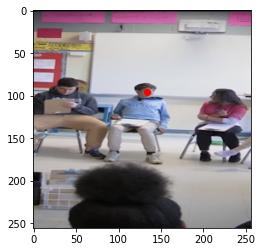

In [92]:

# cor = (heads[0][0]*256,heads[0][1]*256)
# print(cor)
# plt.imshow(images[0])
# plt.plot(heads[0][0]*256,heads[0][1]*256,'ro')

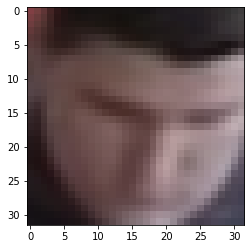

In [94]:
# faces[1]
# plt.imshow(faces[1])

# Predict

In [14]:
preds = model.predict([np.array(images),np.array(faces),np.array(heads)])

In [15]:
preds

[array([[0.68342716, 0.4236331 ],
        [0.12424196, 0.6175177 ],
        [0.7006352 , 0.66651464],
        [0.40136865, 0.764012  ],
        [0.59272444, 0.53721356],
        [0.44674134, 0.7498667 ],
        [0.22297835, 0.6894388 ],
        [0.36260158, 0.7473875 ],
        [0.31482953, 0.7021389 ],
        [0.36089402, 0.33389467],
        [0.74600893, 0.6260648 ],
        [0.34676534, 0.6198553 ],
        [0.54664487, 0.63439894],
        [0.11347187, 0.83799744],
        [0.16121347, 0.7186872 ],
        [0.3188185 , 0.8118571 ],
        [0.5349232 , 0.5911131 ],
        [0.40938675, 0.69972575],
        [0.5686033 , 0.49705228],
        [0.38748783, 0.7137804 ],
        [0.4116887 , 0.40301687],
        [0.24713628, 0.6506573 ],
        [0.47124994, 0.7207968 ],
        [0.3856306 , 0.62481904],
        [0.7772398 , 0.61790454],
        [0.556052  , 0.5143341 ],
        [0.13637029, 0.583302  ],
        [0.76553255, 0.5455744 ],
        [0.54167515, 0.3410722 ],
        [0.530

# Paint 

In [26]:
# df_valfnames = pd.DataFrame(zip(filenames,range(len(filenames))), columns=['filenames','index'])
# print(df_valfnames)
# grouped_df = df_valfnames.groupby(['filenames'], as_index=False).groups

   filenames  index
0      4.png      0
1      4.png      1
2      5.png      2
3      5.png      3
4      5.png      4
5      5.png      5
6      5.png      6
7      5.png      7
8      5.png      8
9     10.png      9
10    10.png     10
11    10.png     11
12     8.png     12
13     8.png     13
14     8.png     14
15     8.png     15
16     7.png     16
17     7.png     17
18     7.png     18
19     7.png     19
20     7.png     20
21     7.png     21
22     7.png     22
23     7.png     23
24     7.png     24
25     7.png     25
26     7.png     26
27     7.png     27
28     6.png     28
29     6.png     29
30     6.png     30
31     6.png     31
32     6.png     32
33     6.png     33
34     6.png     34
35     3.png     35
36     2.png     36
37     2.png     37
38     2.png     38
39     2.png     39
40     1.png     40
41     1.png     41
42     1.png     42
43     1.png     43
44     9.png     44
45     9.png     45


In [27]:
# print(grouped_df)

{'1.png': [40, 41, 42, 43], '10.png': [9, 10, 11], '2.png': [36, 37, 38, 39], '3.png': [35], '4.png': [0, 1], '5.png': [2, 3, 4, 5, 6, 7, 8], '6.png': [28, 29, 30, 31, 32, 33, 34], '7.png': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], '8.png': [12, 13, 14, 15], '9.png': [44, 45]}


In [29]:
#  for i, k in enumerate(grouped_df.keys()):
#         print(i,k)
#         print(grouped_df[k])

0 1.png
Int64Index([40, 41, 42, 43], dtype='int64')
1 10.png
Int64Index([9, 10, 11], dtype='int64')
2 2.png
Int64Index([36, 37, 38, 39], dtype='int64')
3 3.png
Int64Index([35], dtype='int64')
4 4.png
Int64Index([0, 1], dtype='int64')
5 5.png
Int64Index([2, 3, 4, 5, 6, 7, 8], dtype='int64')
6 6.png
Int64Index([28, 29, 30, 31, 32, 33, 34], dtype='int64')
7 7.png
Int64Index([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype='int64')
8 8.png
Int64Index([12, 13, 14, 15], dtype='int64')
9 9.png
Int64Index([44, 45], dtype='int64')


# draw lines

In [27]:
Image.open('TestData/1.png')
w= np.size(ima)[0]
h= np.size(ima)[1]
preds[0][res][0]*w, preds[0][res][1]*h

(609.1990214586258, 356.8683063983917)

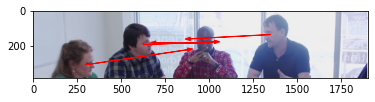

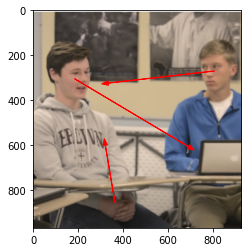

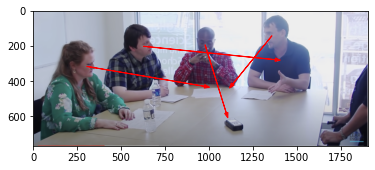

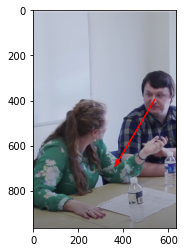

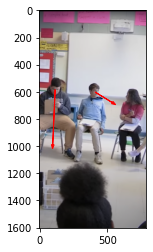

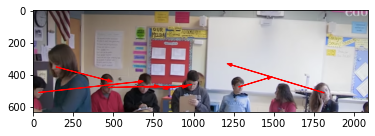

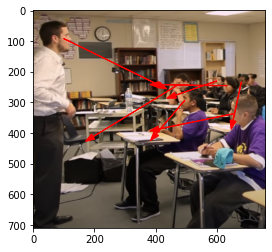

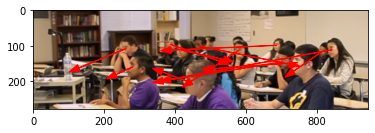

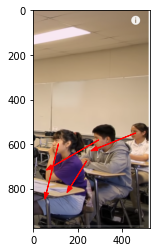

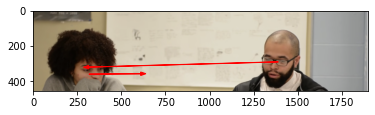

In [28]:
df_valfnames = pd.DataFrame(zip(filenames,range(len(filenames))), columns=['filenames','index'])
grouped_df = df_valfnames.groupby(['filenames'], as_index=False).groups
for i, k in enumerate(grouped_df.keys()):
    ima = Image.open('TestData/'+ k)
    w= np.size(ima)[0]
    h= np.size(ima)[1]
                     
    fa_in = grouped_df[k]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for res in fa_in:
        plt.arrow(heads[res][0]*w, heads[res][1]*h, preds[0][res][0]*w-heads[res][0]*w, preds[0][res][1]*h-heads[res][1]*h,color = "red",width=1,head_width=20)
    plt.imshow(ima.convert('RGB'))
    plt.show()
    

# Try with other model

In [ ]:
# 3 input:
#     frame: figure array(0-1)RGB
#     head:0-1
#     face: figure array(0-255)RGB
# output:
#     cord: 0-1

In [26]:
model2 = keras.models.load_model("save_model/10", custom_objects={'euclideanLoss':euclideanLoss,'categorical_accuracy':categorical_accuracy})
preds_train2 = model2.predict([np.array(images),np.array(faces),np.array(heads)])
preds_train2

[array([[0.5153978 , 0.6330705 ],
        [0.09974727, 0.65427405],
        [0.54345965, 0.8145916 ],
        [0.3211881 , 0.78660613],
        [0.6619761 , 0.60540855],
        [0.19757225, 0.7753338 ],
        [0.10512826, 0.6431107 ],
        [0.2519694 , 0.8202089 ],
        [0.23943192, 0.80546963],
        [0.523233  , 0.68951184],
        [0.76316714, 0.5167161 ],
        [0.28555375, 0.83356565],
        [0.3494495 , 0.8452685 ],
        [0.22282387, 0.82269645],
        [0.17164353, 0.7644292 ],
        [0.462275  , 0.7679463 ],
        [0.4002509 , 0.68510944],
        [0.3652869 , 0.6223515 ],
        [0.31996506, 0.49204767],
        [0.4815729 , 0.771071  ],
        [0.326945  , 0.5583959 ],
        [0.06142963, 0.59215313],
        [0.26655567, 0.56459385],
        [0.32506287, 0.602046  ],
        [0.6865933 , 0.6628169 ],
        [0.18726851, 0.6644083 ],
        [0.34437156, 0.7546603 ],
        [0.55093133, 0.5781794 ],
        [0.5035845 , 0.44138026],
        [0.198

# Original 

In [19]:
def scale_image(img):
    x_min = img.min(axis=(1, 2), keepdims=True)
    x_max = img.max(axis=(1, 2), keepdims=True)

    img = (img - x_min) / ((x_max - x_min) + 1e-7)
    return img

def load_data(face, annotation, files):
    data = np.load(face)
    faces = data['faces']
    faces = scale_image(faces)

    data_coord = np.load(annotation)
    heads = data_coord['heads']
    gazes = data_coord['gazes']
    inout_frame = data_coord['inout_frame']
    inout_frame = keras.utils.to_categorical(inout_frame)

    df = pd.read_csv(files)
    filenames = np.asarray(df['filename'])
    return filenames, faces, heads, gazes, inout_frame

or_filenames, or_faces, or_heads, or_gazes, or_inout_frame = load_data(
#     face_file, annotation_file, filename_file
               face="data/face_head_gaze_try.npz", 
               annotation="data/head_gaze_coord_try.npz",
               files="data/train_annotation_try.csv",)

In [ ]:
preds_train2 = model2.predict([np.array(images),np.array(faces),np.array(heads)])
preds_train2